<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2026-02-11 01:37:20--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  65.5MB/s    in 3.1s    

2026-02-11 01:37:25 (65.5 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 174.9 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 95.7 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


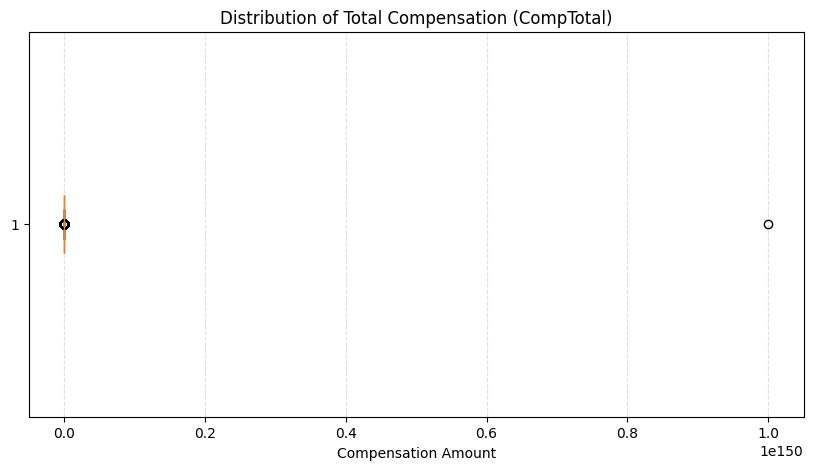

In [8]:
# Load CompTotal from the database
QUERY = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""
df_comp = pd.read_sql_query(QUERY, conn)

# Convert to numeric (CompTotal may contain strings)
df_comp['CompTotal'] = pd.to_numeric(df_comp['CompTotal'], errors='coerce')

# Drop missing or invalid values
df_comp = df_comp.dropna()

# Box plot
plt.figure(figsize=(10, 5))
plt.boxplot(df_comp['CompTotal'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='#4C72B0', alpha=0.6))

plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('Compensation Amount')
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.show()


A box plot is the correct choice because the task explicitly asks for a distribution‑focused visualization that highlights spread, central tendency, and outliers.

- Interpretation Summary

The compensation data shows a **highly right‑skewed distribution**, where most respondents report compensation values clustered toward the lower end of the scale. The box itself is compressed near the left side, indicating that the interquartile range is relatively small compared to the extreme values. A very large number of outliers extend far to the right, including at least one extreme value that is orders of magnitude larger than the rest. This pattern suggests the `presence of data entry errors or exceptionally high earners` that distort the scale. Overall, the plot reveals that typical compensation values are modest, while a small number of extreme values dominate the upper tail.

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


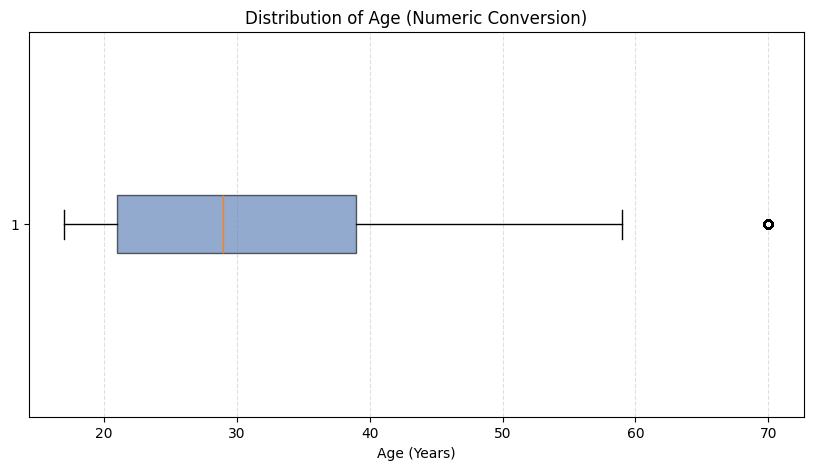

In [10]:
# 1. Load Age from the database
QUERY = """
SELECT Age
FROM main
WHERE Age IS NOT NULL
"""
df_age = pd.read_sql_query(QUERY, conn)

# 2. Convert Age ranges to numeric midpoints
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': None
}

df_age['AgeNumeric'] = df_age['Age'].map(age_map)
df_age = df_age.dropna()

# 3. Box plot
plt.figure(figsize=(10, 5))
plt.boxplot(df_age['AgeNumeric'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='#4C72B0', alpha=0.6))

plt.title('Distribution of Age (Numeric Conversion)')
plt.xlabel('Age (Years)')
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.show()



### Interpretation of the box‑plot output:
  
The visualization shows a compressed distribution with most values between the early 20s and late 40s. The median sits in the late‑20s to early‑30s range, reflecting the dominant age group in the dataset. The whiskers extend toward older ages, and a small number of outliers appear near the upper end, representing respondents in the 65+ category. The overall pattern indicates a workforce concentrated in younger and mid‑career brackets, with fewer participants in the oldest age ranges.

In [18]:
# # To check the order of distribution
# QUERY = """
# SELECT Age, COUNT(*) AS Count
# FROM main
# WHERE Age IS NOT NULL
# GROUP BY Age
# ORDER BY Count
# """
# df_age = pd.read_sql_query(QUERY, conn)
# print(df_age)

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


<Figure size 1200x600 with 0 Axes>

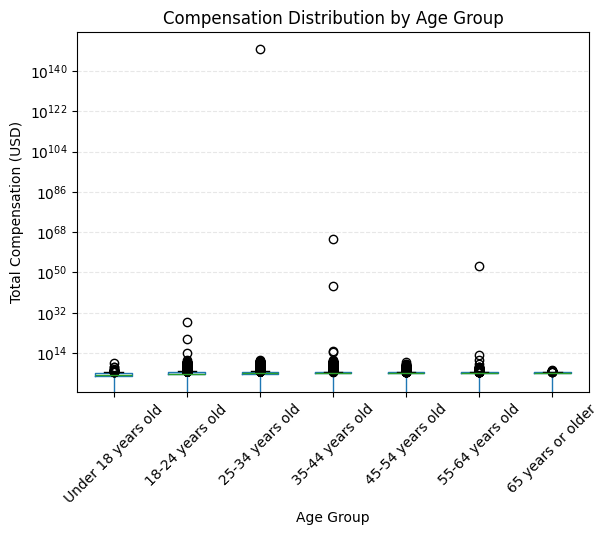

In [23]:
# 1. Load Age and Compensation
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""
df_age_comp = pd.read_sql_query(QUERY, conn)

# 2. Convert Age categories into ordered groups
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]

df_age_comp = df_age_comp[df_age_comp['Age'].isin(age_order)]
df_age_comp['Age'] = pd.Categorical(df_age_comp['Age'], categories=age_order, ordered=True)

# 3. Convert CompTotal to numeric
df_age_comp['CompTotal'] = pd.to_numeric(df_age_comp['CompTotal'], errors='coerce')
df_age_comp = df_age_comp.dropna()

# # Remove extreme outliers (place the line HERE) Uncomment the following line
# df_age_comp = df_age_comp[df_age_comp['CompTotal'] < 1_000_000]

# 5. Box plot
plt.figure(figsize=(12, 6))
df_age_comp.boxplot(column='CompTotal', by='Age', vert=True, grid=False)

plt.yscale('log')  # Uncomment this line to make the plot readable
plt.title('Compensation Distribution by Age Group')
plt.suptitle('')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()


### Interpretation summary

Compensation generally increases with age, but the spread within each group remains wide. Early‑career respondents (under 18 and 18–24) show the lowest and most compact compensation ranges, reflecting entry‑level earnings. The 25–34 and 35–44 groups display both higher medians and broader variability, which is typical of mid‑career stages where roles and pay levels diverge more sharply. Older groups continue to show higher typical compensation, though the spread narrows slightly, suggesting more stable earnings later in the career. The log scale highlights that compensation grows with experience but remains uneven across individuals within every age bracket.
>The box plot shows how compensation varies across age groups after removing extreme outliers and applying a log scale.

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


<Figure size 1200x600 with 0 Axes>

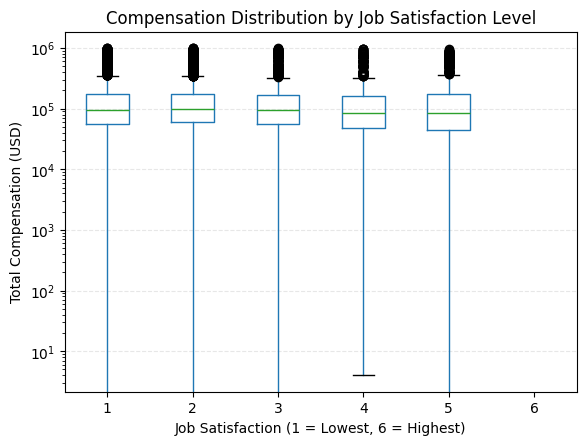

In [31]:
# 1. Load Job Satisfaction and Compensation
QUERY = """
SELECT JobSatPoints_6, CompTotal
FROM main
WHERE JobSatPoints_6 IS NOT NULL AND CompTotal IS NOT NULL
"""
df_js = pd.read_sql_query(QUERY, conn)

# 2. Convert to numeric
df_js['JobSatPoints_6'] = pd.to_numeric(df_js['JobSatPoints_6'], errors='coerce')
df_js['CompTotal'] = pd.to_numeric(df_js['CompTotal'], errors='coerce')
df_js = df_js.dropna()

# 3. Convert 0–100 scale into 1–6 buckets
bins = [0, 20, 40, 60, 80, 100, 120]
labels = [1, 2, 3, 4, 5, 6]

df_js['JobSatGroup'] = pd.cut(df_js['JobSatPoints_6'], bins=bins, labels=labels, include_lowest=True)

# 4. Remove extreme compensation outliers
df_js = df_js[df_js['CompTotal'] < 1_000_000]

# 5. Box plot
plt.figure(figsize=(12, 6))
df_js.boxplot(column='CompTotal', by='JobSatGroup', vert=True, grid=False)

plt.yscale('log')
plt.title('Compensation Distribution by Job Satisfaction Level')
plt.suptitle('')
plt.xlabel('Job Satisfaction (1 = Lowest, 6 = Highest)')
plt.ylabel('Total Compensation (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()


### Interpretation summary

Higher job satisfaction is generally associated with higher compensation, but the relationship is not uniform. 
>The lowest satisfaction groups show smaller, more compressed compensation ranges, suggesting limited variation among respondents who are less satisfied. As satisfaction increases, both the median and the spread of compensation rise, indicating that higher‑earning individuals are more common in the upper satisfaction categories. The wider ranges in the mid‑to‑high satisfaction levels reflect the diversity of roles and seniority among people who report stronger satisfaction. Using a log scale makes these differences easier to see by balancing the natural skew in compensation data.

In [32]:
# # To check the order of distribution
# QUERY = """
# SELECT JobSatPoints_6, CompTotal
# FROM main
# WHERE JobSatPoints_6 IS NOT NULL AND CompTotal IS NOT NULL
# ORDER BY JobSatPoints_6
# """
# df_js = pd.read_sql_query(QUERY, conn)
# print(df_js)


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


<Figure size 1200x600 with 0 Axes>

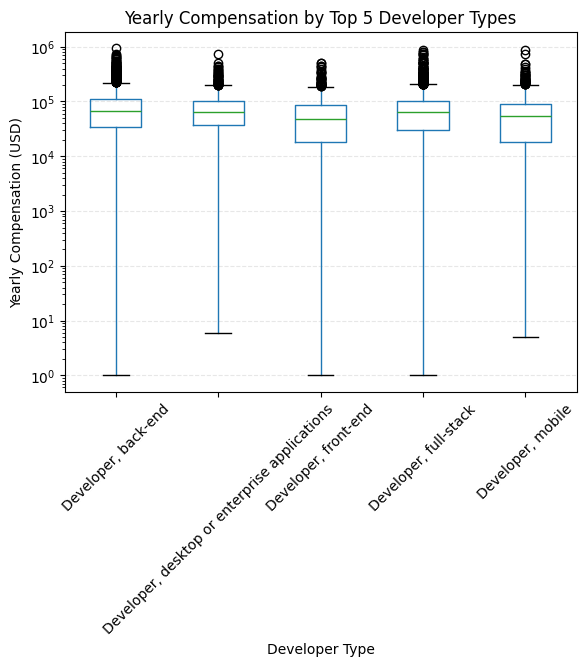

In [33]:
# 1. Load Developer Types and Yearly Compensation
QUERY = """
SELECT DevType, ConvertedCompYearly
FROM main
WHERE DevType IS NOT NULL AND ConvertedCompYearly IS NOT NULL
"""
df_dev = pd.read_sql_query(QUERY, conn)

# 2. Convert compensation to numeric
df_dev['ConvertedCompYearly'] = pd.to_numeric(df_dev['ConvertedCompYearly'], errors='coerce')
df_dev = df_dev.dropna()

# 3. Split DevType (multiple roles separated by ;)
df_exploded = df_dev.assign(DevType=df_dev['DevType'].str.split(';')).explode('DevType')

# 4. Identify top 5 developer types
top5 = (
    df_exploded['DevType']
    .value_counts()
    .head(5)
    .index
)

df_top5 = df_exploded[df_exploded['DevType'].isin(top5)]

# 5. Remove extreme outliers for readability
df_top5 = df_top5[df_top5['ConvertedCompYearly'] < 1_000_000]

# 6. Box plot
plt.figure(figsize=(12, 6))
df_top5.boxplot(column='ConvertedCompYearly', by='DevType', vert=True, grid=False)

plt.yscale('log')
plt.title('Yearly Compensation by Top 5 Developer Types')
plt.suptitle('')
plt.xlabel('Developer Type')
plt.ylabel('Yearly Compensation (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()


`Interpretation summary`
>Compensation patterns differ across the top five developer roles, and the plot makes those differences easy to compare.<br>
Full‑stack and back‑end developers show the highest median compensation, reflecting the broader technical scope and cross‑functional responsibilities common in these roles. Front‑end, mobile, and desktop/enterprise developers display slightly lower medians and more compact distributions, suggesting more consistent pay ranges within those groups. The log scale helps reveal the natural right‑skew in compensation, showing that all roles include higher‑earning outliers, but the concentration and spread of these values vary by specialty. Overall, the plot highlights that compensation is shaped both by the type of development work and by the range of experience levels within each role.

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


<Figure size 1200x600 with 0 Axes>

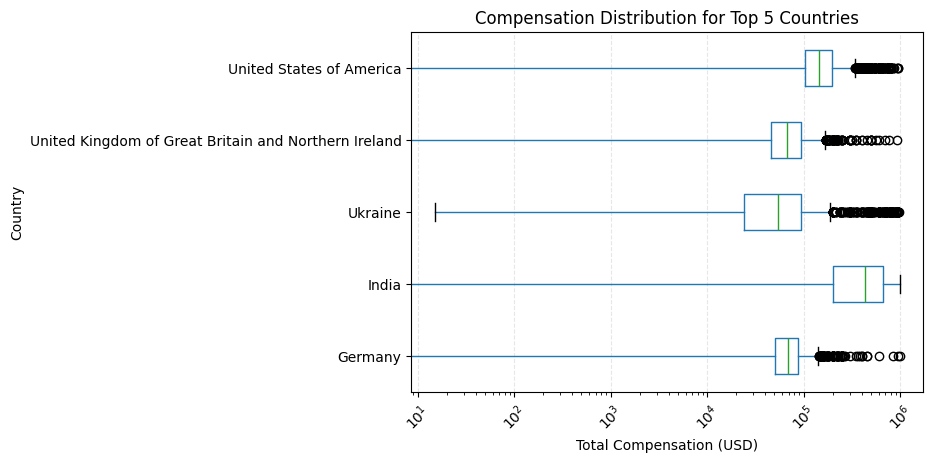

In [41]:
# 1. Load Country and Compensation
QUERY = """
SELECT Country, CompTotal
FROM main
WHERE Country IS NOT NULL AND CompTotal IS NOT NULL
"""
df_ct = pd.read_sql_query(QUERY, conn)

# 2. Convert compensation to numeric
df_ct['CompTotal'] = pd.to_numeric(df_ct['CompTotal'], errors='coerce')
df_ct = df_ct.dropna()

# 3. Identify top 5 countries by respondent count
top5_countries = (
    df_ct['Country']
    .value_counts()
    .head(5)
    .index
)

df_top5 = df_ct[df_ct['Country'].isin(top5_countries)]

# 4. Remove extreme outliers for readability
df_top5 = df_top5[df_top5['CompTotal'] < 1_000_000]

# 5. Box plot
plt.figure(figsize=(12, 6))
df_top5.boxplot(column='CompTotal', by='Country', vert=False, grid=False)

plt.xscale('log')
plt.title('Compensation Distribution for Top 5 Countries')
plt.suptitle('')
plt.xlabel('Total Compensation (USD)')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.show()


`Interpretation summary`
The horizontal version of the plot works well for long country names, and the compensation pattern becomes easier to compare across groups.<br>
Compensation levels differ clearly across the top five countries. The United States shows the highest overall compensation range, with both a strong median and a wide spread of values. India also displays a relatively high median, though with a tighter distribution compared to the U.S. Germany and the United Kingdom fall into a mid‑range pattern, showing moderate medians and more compact spreads. Ukraine has the lowest median and the widest variation, reflecting a mix of lower earnings and a few higher‑earning outliers. Using a horizontal layout with a log scale makes these contrasts easier to read, especially given the long country names and the naturally skewed nature of compensation data.

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


<Figure size 1200x600 with 0 Axes>

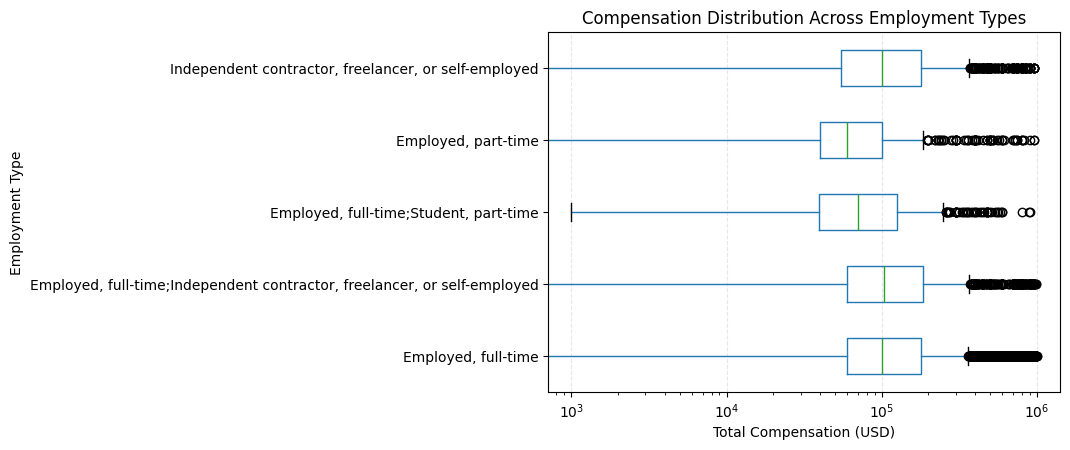

In [42]:
# 1. Load Employment Type and Compensation
QUERY = """
SELECT Employment, CompTotal
FROM main
WHERE Employment IS NOT NULL AND CompTotal IS NOT NULL
"""
df_emp = pd.read_sql_query(QUERY, conn)

# 2. Convert compensation to numeric
df_emp['CompTotal'] = pd.to_numeric(df_emp['CompTotal'], errors='coerce')
df_emp = df_emp.dropna()

# 3. Identify top 5 employment types
top5_emp = (
    df_emp['Employment']
    .value_counts()
    .head(5)
    .index
)

df_top5 = df_emp[df_emp['Employment'].isin(top5_emp)]

# 4. Remove extreme outliers for readability
df_top5 = df_top5[df_top5['CompTotal'] < 1_000_000]

# 5. Horizontal box plot
plt.figure(figsize=(12, 6))
df_top5.boxplot(column='CompTotal', by='Employment', vert=False, grid=False)

plt.xscale('log')
plt.title('Compensation Distribution Across Employment Types')
plt.suptitle('')
plt.xlabel('Total Compensation (USD)')
plt.ylabel('Employment Type')
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.show()


`Interpretation summary`
>Compensation differs noticeably across employment types, and the horizontal layout makes those contrasts easy to read.<br>
Full‑time employees show the highest and most stable compensation levels, reflected in a higher median and a relatively tight distribution. Mixed arrangements—such as full‑time combined with freelance work—display wider spreads, suggesting that supplemental project income can create more variability. Independent contractors and freelancers show even broader ranges, which is typical of project‑based work where earnings depend heavily on contract volume and specialization. Part‑time roles sit lower on the scale with more compact distributions, indicating more structured and predictable pay. The log scale helps reveal these patterns clearly by balancing the natural skew in compensation data.

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


<Figure size 1200x600 with 0 Axes>

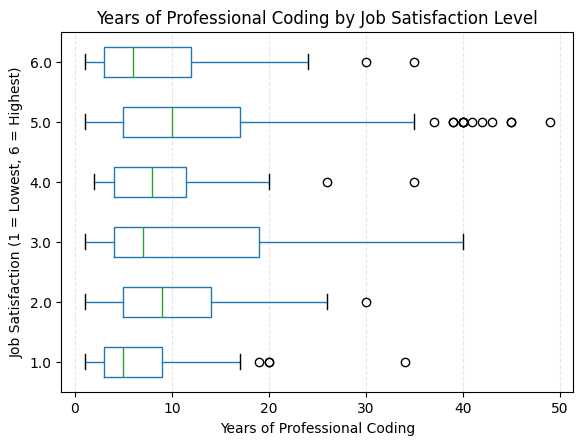

In [50]:
# 1. Load YearsCodePro and Job Satisfaction
QUERY = """
SELECT YearsCodePro, JobSatPoints_6
FROM main
WHERE YearsCodePro IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df_yc = pd.read_sql_query(QUERY, conn)

# 2. Convert both columns to numeric
df_yc['YearsCodePro'] = pd.to_numeric(df_yc['YearsCodePro'], errors='coerce')
df_yc['JobSatPoints_6'] = pd.to_numeric(df_yc['JobSatPoints_6'], errors='coerce')
df_yc = df_yc.dropna()

# 3. Keep valid satisfaction scores (1–6)
df_yc = df_yc[df_yc['JobSatPoints_6'].isin([1, 2, 3, 4, 5, 6])]

# 4. Remove extreme outliers in YearsCodePro
df_yc = df_yc[df_yc['YearsCodePro'] <= 60]

# 5. Horizontal box plot
plt.figure(figsize=(12, 6))
df_yc.boxplot(column='YearsCodePro', by='JobSatPoints_6', vert=False, grid=False)

plt.title('Years of Professional Coding by Job Satisfaction Level')
plt.suptitle('')
plt.xlabel('Years of Professional Coding')
plt.ylabel('Job Satisfaction (1 = Lowest, 6 = Highest)')
plt.grid(axis='x', linestyle='--', alpha=0.3)

# plt.tight_layout()
plt.show()


`Interpretation summary`
The resulting visualization shows a clear relationship between professional coding experience and job satisfaction.<br>
>Job satisfaction levels show noticeable differences in the amount of professional coding experience respondents report. Lower satisfaction groups tend to cluster around fewer years of experience, with tighter distributions that suggest more uniform early‑career stages. As satisfaction increases, the median years of experience generally rises, and the spread becomes wider, reflecting a mix of mid‑career and senior professionals. The highest satisfaction levels include respondents with the broadest range of experience, indicating that long‑term engagement in the field may contribute to higher satisfaction—or that more experienced developers have found roles that better match their expectations. The horizontal layout makes these patterns easy to compare across satisfaction levels.

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [51]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
